### Step:1 Import & Read Section

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import missingno as msno

In [3]:
## California ACT and SAT files.
act19_ca = pd.read_csv(r'../project_1/data/act_2019_ca.csv')
sat19_ca = pd.read_csv(r'../project_1/data/sat_2019_ca.csv')

In [4]:
### Additional Files
act17_ca = pd.read_excel(r'./additional data/ACT17_CA.xlsx',skiprows=5)
act18_ca = pd.read_excel(r'./additional data/ACT18_CA.xlsx',skiprows=5)
act20_ca = pd.read_excel(r'./additional data/ACT20_CA.xlsx',skiprows=5)
sat17_ca = pd.read_excel(r'./additional data/SAT17_CA.xlsx')
sat18_ca = pd.read_excel(r'./additional data/SAT18_CA.xlsx')
sat20_ca = pd.read_excel(r'./additional data/SAT20_CA.xlsx',skiprows=5)

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


#### Year Adding

In [5]:
act17_ca['Year'] = '2016-17'
act18_ca['Year'] = '2017-18'
act20_ca['Year'] = '2019-20'
sat17_ca['Year'] = '2016-17'
sat18_ca['Year'] = '2017-18'
sat20_ca['Year'] = '2019-20'

#### Columns Rename

In [6]:
list = ['act17_ca','act18_ca','act20_ca','sat17_ca','sat18_ca','sat20_ca']
for i in list:
    globals()[i] = globals()[i].rename(columns={'Rtype':'RType','Sname':'SName','Dname':'DName','Cname':'CName'})

In [7]:
act17_ca.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'NumTstTakr',
       'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21',
       'PctGE21', 'Year'],
      dtype='object')

In [8]:
act17_ca.head()

,CDS,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
0,0,X,State of California,State of California,State of California,484169.0,109506.0,22,23,22,22,63629,58.11,2016-17
1,1000000000000,C,NaN,NaN,Alameda,16638.0,4587.0,24,25,25,24,3193,69.61,2016-17
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,253.0,9.0,*,*,*,*,*,*,2016-17
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,81.0,9.0,*,*,*,*,*,*,2016-17
4,1316170131763,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,86.0,26.0,12,16,16,16,1,3.85,2016-17


### SAT Rename

##### SAT (19-20) Rename

In [9]:
dict_cols = {'NumTSTTakr12':'ttk12', 'NumERWBenchmark12':'erw12', 'PctERWBenchmark12':'erw12_perc',
       'NumMathBenchmark12':'math12', 'PctMathBenchmark12':'math12_perc'
             ,'NumTSTTakr11':'ttk11',
       'NumERWBenchmark11':'erw11', 'PctERWBenchmark11':'erw11_perc', 'NumMathBenchmark11':'math11',
       'PctMathBenchmark11':'math11_perc', 'TotNumBothBenchmark12':'tot12', 'PctBothBenchmark12':'tot12_perc',
       'TotNumBothBenchmark11':'tot11', 'PctBothBenchmark11':'tot11_perc'
             ,'Rtype':'RType','Sname':'SName','Dname':'DName','Cname':'CName'
             ,'cds':'CDS', 'rtype':'RType', 'sname':"SName",
       'dname':'DName', 'cname':'CName','dname':'DName', 'cname':'CName','enroll12':'Enroll12','year':'Year'}

In [10]:
sat19_ca = sat19_ca.rename(columns=dict_cols)
sat20_ca = sat20_ca.rename(columns=dict_cols)

In [11]:
sat19_ca.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'ttk12', 'erw12', 'erw12_perc', 'math12', 'math12_perc',
       'Enroll11', 'ttk11', 'erw11', 'erw11_perc', 'math11', 'math11_perc',
       'tot12', 'tot12_perc', 'tot11', 'tot11_perc', 'Year'],
      dtype='object')

#### SAT (17-18) Rename

In [12]:
dict_cols_new = {'NumTstTakr':'ttk12',
       'NumCurrElaBenchmark':'erw12', 'NumPreElaBenchmark':'nperw', 'TotNumElaBenchmark':'toterw',
       'PctElaBenchmark':'erw12_perc', 'NumCurrMathBenchmark':'math12', 'NumPreMathBenchmark':'npmath',
       'TotNumMathBenchmark':'totmath', 'PctMathBenchmark':'math12_perc', 'TotNumBothBenchmark':'tot12',
       'PctBothBenchmark':'tot12_perc'
                 ,'Rtype':'RType','Sname':'SName','Dname':'DName','Cname':'CName'
                 ,'cds':'CDS', 'rtype':'RType', 'sname':"SName",'dname':'DName', 'cname':'CName','enroll12':'Enroll12','year':'Year'}

In [13]:
list = ['sat17_ca','sat18_ca']
for i in list:
    globals()[i] = globals()[i].rename(columns=dict_cols_new)

In [14]:
sat18_ca.columns

Index(['CDS', 'Ccode', 'CDcode', 'Scode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'ttk12', 'erw12', 'nperw', 'toterw', 'erw12_perc', 'math12',
       'npmath', 'totmath', 'math12_perc', 'tot12', 'tot12_perc', 'Year'],
      dtype='object')

In [15]:
#sat17_ca = sat17_ca.rename(columns=dict_cols)
sat17_ca.head()

,CDS,RType,SName,DName,CName,Enroll12,ttk12,erw12,nperw,toterw,erw12_perc,math12,npmath,totmath,math12_perc,tot12,tot12_perc,Year
0,0,X,State of California,State of California,State of California,484169,221433,144893,15103,159996,72.25,98504,13887,112391,50.76,107173,48.40,2016-17
1,1000000000000,C,NaN,NaN,Alameda,16638,9029,5407,1376,6783,75.12,4033,1337,5370,59.48,5147,57.01,2016-17
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,253,83,28,0,28,33.73,9,0,9,10.84,9,10.84,2016-17
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,81,83,28,0,28,33.73,9,0,9,10.84,9,10.84,2016-17
4,1611190000000,D,NaN,Alameda Unified,Alameda,910,495,373,51,424,85.66,298,47,345,69.70,330,66.67,2016-17


#### Concatenate SAT & ACT.

In [16]:
act_ca = pd.concat([act17_ca,act18_ca,act19_ca,act20_ca])
sat_ca = pd.concat([sat17_ca,sat18_ca,sat19_ca,sat20_ca])

### Step2 .Missing Value Visualization

In [17]:
def missing_function(var,name):    
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    msno.bar(var,ax=ax[0])
    msno.matrix(var,ax=ax[1])
    ax[0].set_title('Missing Value by Features of '+name)
    ax[1].set_title('Missing Value by Locations of '+name)
    ax[1].set_ylabel('Row')

#### ACT Missing Value Visualization

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


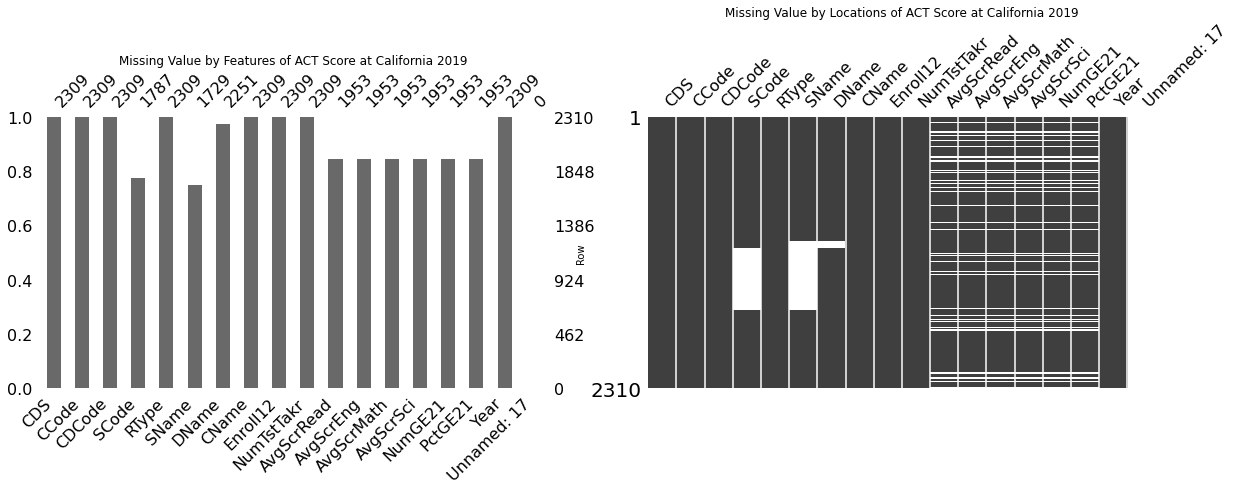

In [18]:
missing_function(act19_ca,'ACT Score at California 2019')

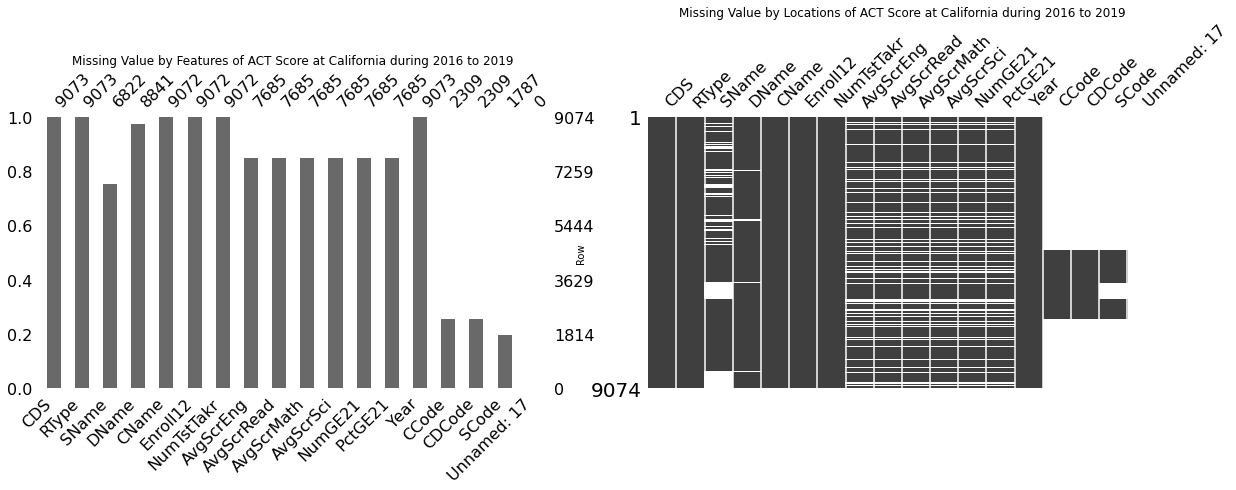

In [19]:
missing_function(act_ca,'ACT Score at California during 2016 to 2019')

#### SAT Missing Value Visualization

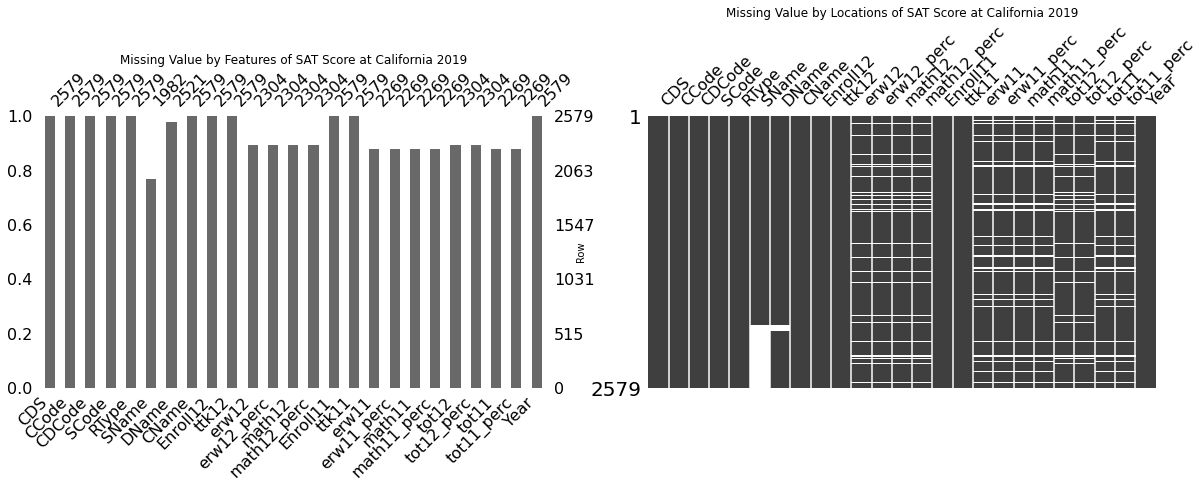

In [20]:
missing_function(sat19_ca,'SAT Score at California 2019')

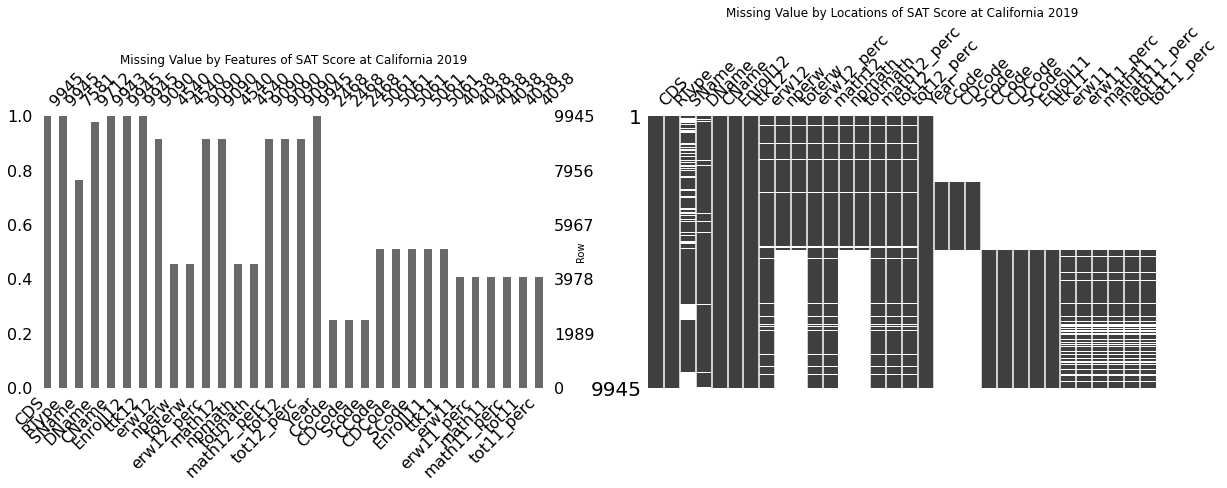

In [21]:
missing_function(sat_ca,'SAT Score at California 2019')

#### Drop Unwanted Columns

ACT

In [22]:
act_ca_new = act_ca.drop(['CCode','CDCode','SCode','Unnamed: 17'],axis=1)

In [23]:
act_ca_new.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'NumTstTakr',
       'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21',
       'PctGE21', 'Year'],
      dtype='object')

SAT

In [24]:
sat_ca.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'ttk12', 'erw12',
       'nperw', 'toterw', 'erw12_perc', 'math12', 'npmath', 'totmath',
       'math12_perc', 'tot12', 'tot12_perc', 'Year', 'Ccode', 'CDcode',
       'Scode', 'CCode', 'CDCode', 'SCode', 'Enroll11', 'ttk11', 'erw11',
       'erw11_perc', 'math11', 'math11_perc', 'tot11', 'tot11_perc'],
      dtype='object')

In [25]:
sat_ca_new = sat_ca.drop(['CCode','CDCode','SCode','Ccode','CDcode','Scode',
                          'Enroll11', 'ttk11', 'erw11','erw11_perc', 'math11',
                          'math11_perc', 'tot11', 'tot11_perc'
                          ,'nperw', 'toterw','npmath', 'totmath'
                          ],axis=1)

In [26]:
sat_ca_new.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'ttk12', 'erw12',
       'erw12_perc', 'math12', 'math12_perc', 'tot12', 'tot12_perc', 'Year'],
      dtype='object')

#### Pre-dropping Check

In [27]:
print(f"act shape :{act_ca_new.shape}")
print(f"act shape : {sat_ca_new.shape}")

act shape :(9074, 14)
act shape : (9945, 14)


#### Missing Values Filling out

In [28]:
## fill na out to be "-" at SName and DName
act_ca_new['SName'] = act_ca_new['SName'].fillna('-')
act_ca_new['DName'] = act_ca_new['DName'].fillna('-')
act_ca_new['CName'] = act_ca_new['CName'].fillna('-')

## fill na out for zero-test taker. 
## Drop it because it does not come out with any scores.
#act_ca_new = act_ca_new.dropna()
act_ca_new = act_ca_new[act_ca_new['NumTstTakr'] != 0]

## fill na out to be "-" at SName and DName
sat_ca_new['SName'] = sat_ca_new['SName'].fillna('-')
sat_ca_new['DName'] = sat_ca_new['DName'].fillna('-')
sat_ca_new['CName'] = sat_ca_new['CName'].fillna('-')

## fill na out for zero-test taker.
## Drop it because it does not come out with any scores.
sat_ca_new = sat_ca_new[sat_ca_new['ttk12'] != 0]

#### Missing Value Percentage

In [29]:
## ACT Data

list_hist = ['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','NumGE21'] 
for i in list_hist:
    print(f"Percentage of missing value of {i} is {round(act_ca_new[act_ca_new[i] == '*']['NumTstTakr'].sum() *100 / act_ca_new['NumTstTakr'].sum(),2)} %")

Percentage of missing value of AvgScrEng is 0.76 %
Percentage of missing value of AvgScrRead is 0.76 %
Percentage of missing value of AvgScrMath is 0.76 %
Percentage of missing value of AvgScrSci is 0.76 %
Percentage of missing value of NumGE21 is 0.76 %


In [30]:
## SAT Data
list_sat = ['erw12','math12']
for i in list_sat:
    print(f"Percentage of missing value of {i} is {round(sat_ca_new[sat_ca_new[i] == '*']['ttk12'].sum() *100 / act_ca_new['NumTstTakr'].sum(),2)} %")

Percentage of missing value of erw12 is 0.68 %
Percentage of missing value of math12 is 0.68 %


#### DataFrame before '*' Dropping

In [31]:
act_ca_predrop = act_ca_new.copy()
sat_ca_predrop = sat_ca_new.copy()
### Year Change Type
year_dict = ['2016-17','2017-18','2018-19','2019-20']
year_dict_new = ['2017','2018','2019','2020']

for i in range(len(year_dict)):
    act_ca_predrop['Year'] = act_ca_predrop['Year'].str.replace(year_dict[i],year_dict_new[i])
    sat_ca_predrop['Year'] = sat_ca_predrop['Year'].str.replace(year_dict[i],year_dict_new[i])

#### Missing Value (Asterisk) Dropping

In [32]:
## ACT Data

list_hist = ['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','NumGE21'] 
for i in list_hist:
    act_ca_new = act_ca_new[act_ca_new[i] != '*']
    
## SAT Data

list_sat = ['erw12','math12']
for i in list_sat:
    sat_ca_new = sat_ca_new[sat_ca_new[i] != '*']

### 🎇 Post-cleansing Visualization

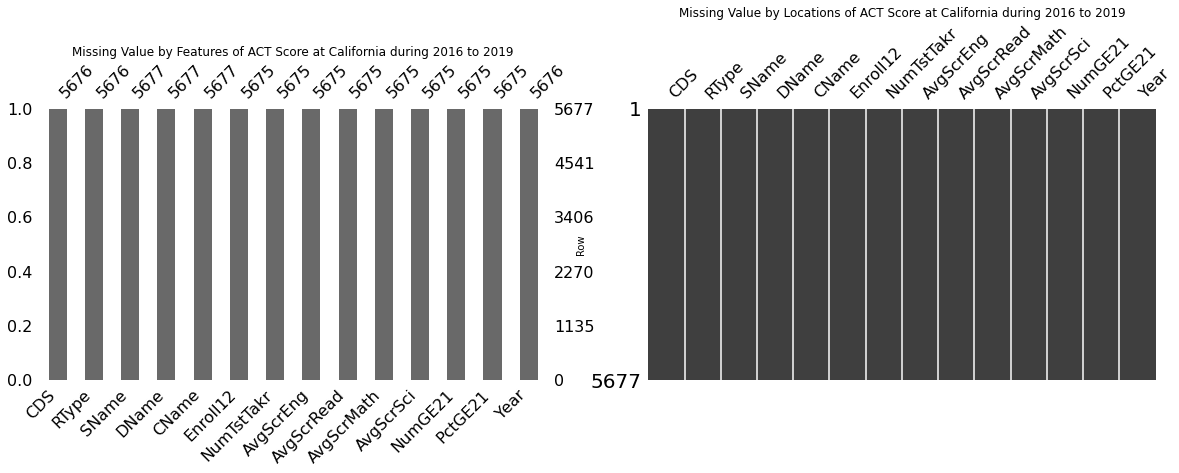

In [33]:
missing_function(act_ca_new,'ACT Score at California during 2016 to 2019')

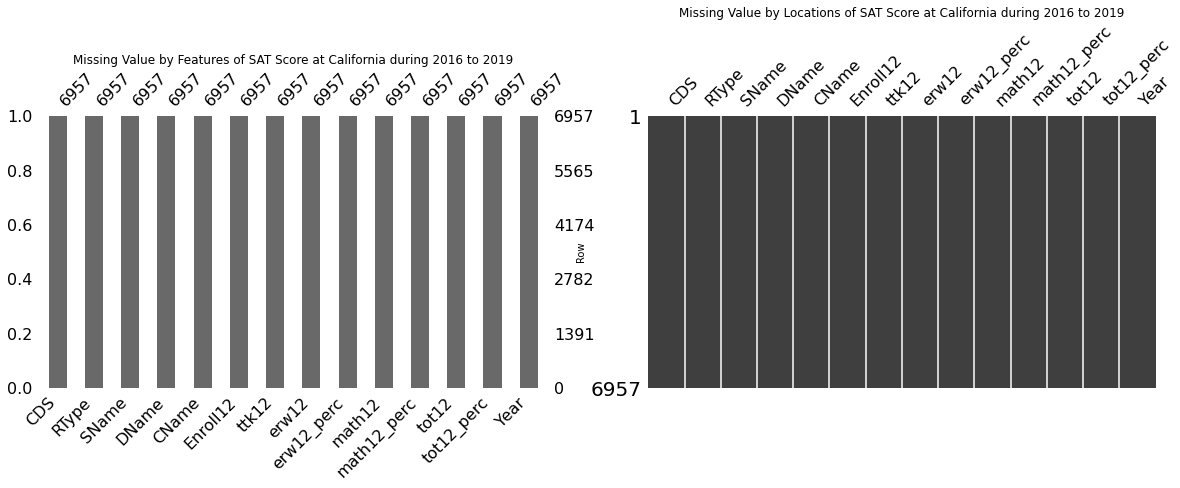

In [34]:
missing_function(sat_ca_new,'SAT Score at California during 2016 to 2019')

### Check Data Types

In [35]:
act_ca_new.dtypes

CDS           float64
RType          object
SName          object
DName          object
CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrEng      object
AvgScrRead     object
AvgScrMath     object
AvgScrSci      object
NumGE21        object
PctGE21        object
Year           object
dtype: object

In [36]:
sat_ca_new.dtypes

CDS            float64
RType           object
SName           object
DName           object
CName           object
Enroll12         int64
ttk12            int64
erw12           object
erw12_perc      object
math12          object
math12_perc     object
tot12           object
tot12_perc      object
Year            object
dtype: object

### Change Data Types

In [37]:
## ACT 

list_hist = ['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','NumGE21'] 
for i in list_hist:
    act_ca_new[i] = act_ca_new[i].astype('float64')
    
## SAT

list_sat = ['erw12','math12','erw12_perc','math12_perc']
for i in list_sat:
    sat_ca_new[i] = sat_ca_new[i].astype('float64')

In [38]:
### Year Change Type
year_dict = ['2016-17','2017-18','2018-19','2019-20']
year_dict_new = ['2017','2018','2019','2020']

for i in range(len(year_dict)):
    act_ca_new['Year'] = act_ca_new['Year'].str.replace(year_dict[i],year_dict_new[i])
    sat_ca_new['Year'] = sat_ca_new['Year'].str.replace(year_dict[i],year_dict_new[i])

## Year Dropping for unclear Data
act_ca_new = act_ca_new[act_ca_new['Year'].isnull() == False]
    
act_ca_new['Year'] = act_ca_new['Year'].astype('int64')
sat_ca_new['Year'] = sat_ca_new['Year'].astype('int64')
    
    
print(f"Year Columns types in act : {act_ca_new['Year'].dtype}")
print(f"Year Columns types in act : {sat_ca_new['Year'].dtype}")      

Year Columns types in act : int64
Year Columns types in act : int64


#### Drop Unconsistency Data

In [39]:
act_ca_new = act_ca_new[act_ca_new['Enroll12'].isnull() == False]

### Post-Change

In [40]:
act_ca_new.dtypes

CDS           float64
RType          object
SName          object
DName          object
CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrEng     float64
AvgScrRead    float64
AvgScrMath    float64
AvgScrSci     float64
NumGE21       float64
PctGE21        object
Year            int64
dtype: object

In [41]:
sat_ca_new.dtypes

CDS            float64
RType           object
SName           object
DName           object
CName           object
Enroll12         int64
ttk12            int64
erw12          float64
erw12_perc     float64
math12         float64
math12_perc    float64
tot12           object
tot12_perc      object
Year             int64
dtype: object

## Section 3 : Exploratory Data Analysis.
### 🌋Geographical Analysis

In [42]:
list1 = ['CName','DName','SName']
list2 = ['County','District','School']

## To find the union of list in County, District and School Name.
for i in range(3):    
    len_cal = \
    len(set(act19_ca[act19_ca[list1[i]].isnull() == False][list1[i]].unique()\
           ).union(sat19_ca[sat19_ca[list1[i]].isnull() == False][list1[i]].unique()))

    print(f"Number of Unique {list2[i]} in California State is {len_cal - 1}")

Number of Unique County in California State is 58
Number of Unique District in California State is 541
Number of Unique School in California State is 1908


### 🧡 Test Preference Analysis

In [43]:
## Normalize the based year 2017 into 100 %.
act_ttk_trend = pd.DataFrame(act_ca_predrop.groupby('Year')['NumTstTakr'].sum())
sat_ttk_trend = pd.DataFrame(sat_ca_predrop.groupby('Year')['ttk12'].sum())
act_ttk_trend = act_ttk_trend.div(act_ttk_trend.iloc[0])*100
sat_ttk_trend = sat_ttk_trend.div(sat_ttk_trend.iloc[0])*100
act_ttk_trend.columns = ['ACT Grade12']
sat_ttk_trend.columns = ['SAT Grade12']

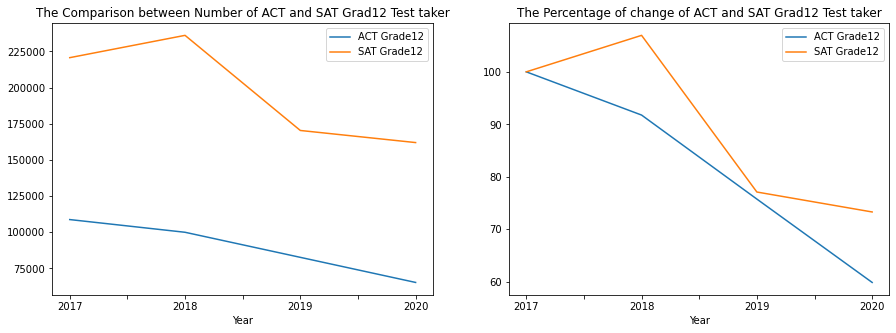

In [44]:
act_ca_predrop = act_ca_predrop[act_ca_predrop['RType'] == 'S']
sat_ca_predrop = sat_ca_predrop[sat_ca_predrop['RType'] == 'S']


## The comparative preference between SAT and ACT Grade12 Test Taker by Year.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
act_ca_predrop.groupby('Year')['NumTstTakr'].sum().plot(label='ACT Grade12',ax=ax1)
sat_ca_predrop.groupby('Year')['ttk12'].sum().plot(label='SAT Grade12',ax=ax1)
ax1.legend()
ax1.set_title('The Comparison between Number of ACT and SAT Grad12 Test taker')
act_ttk_trend.plot(label='ACT Grade12',ax=ax2)
sat_ttk_trend.plot(label='SAT Grade12',ax=ax2)
ax2.legend()
ax2.set_title('The Percentage of change of ACT and SAT Grad12 Test taker')
plt.show()

### ✍️Test Taking Ratio

In [45]:
act_ca_predrop['TTK_Perc'] = act_ca_predrop['NumTstTakr']/act_ca_predrop['Enroll12']
sat_ca_predrop['TTK_Perc'] = sat_ca_predrop['ttk12']/sat_ca_predrop['Enroll12']
act_ca_predrop.groupby('Year')['NumTstTakr'].sum().plot(label='ACT Grade12',ax=ax1)
sat_ca_predrop.groupby('Year')['ttk12'].sum().plot(label='SAT Grade12',ax=ax1)

<AxesSubplot:title={'center':'The Comparison between Number of ACT and SAT Grad12 Test taker'}, xlabel='Year'>

### 🏫 ACT Analysis

<AxesSubplot:>

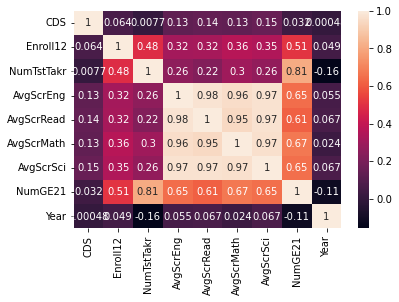

In [46]:
act_df = act_ca_new[act_ca_new['RType'] == 'S']
sns.heatmap(act_df.corr(),annot=True)

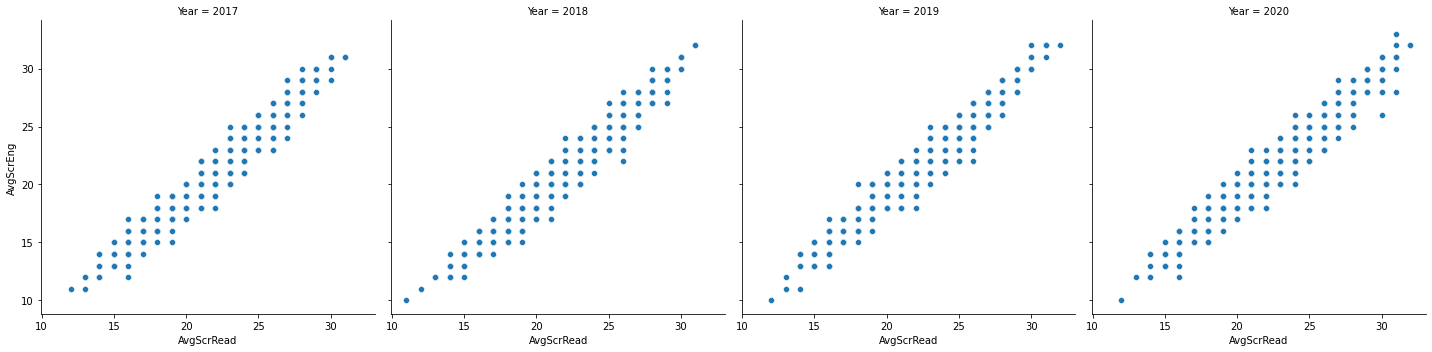

In [47]:
sns.relplot(x='AvgScrRead',y='AvgScrEng',data=act_df,col='Year')

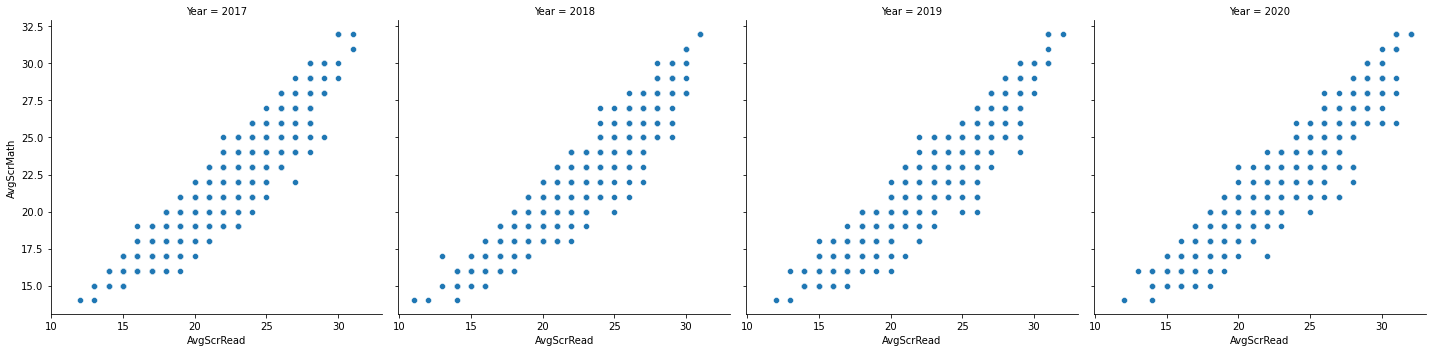

In [48]:
sns.relplot(x='AvgScrRead',y='AvgScrMath',data=act_df,col='Year')

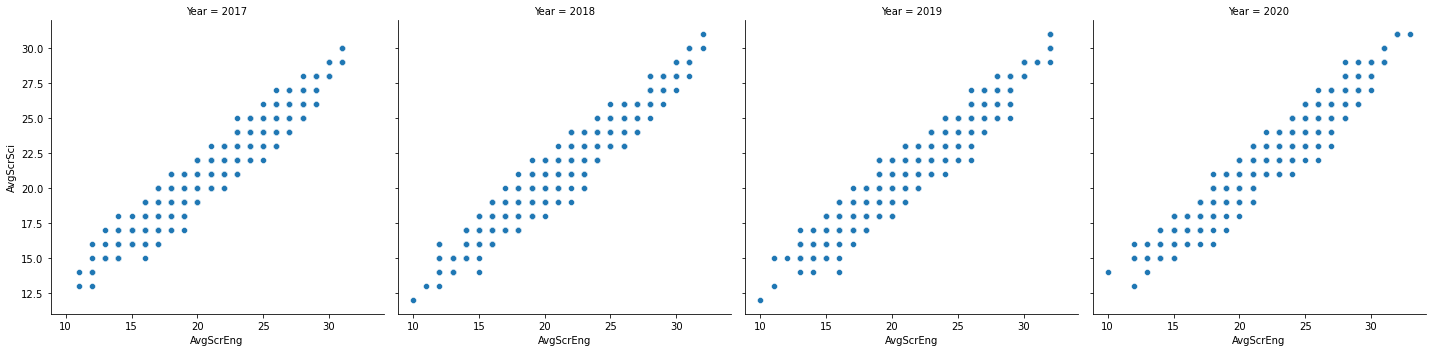

In [49]:
sns.relplot(x='AvgScrEng',y='AvgScrSci',data=act_df,col='Year')

##### ACT Trend Missing Value Analysis

In [50]:
### English Exam.
act_df.pivot_table(values='AvgScrEng',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    66.432954
2    12.708151
1    12.269939
3     8.588957
dtype: float64

In [51]:
### Reading Exam.
act_df.pivot_table(values='AvgScrRead',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    66.432954
2    12.708151
1    12.269939
3     8.588957
dtype: float64

In [52]:
### Math Exam.
act_df.pivot_table(values='AvgScrMath',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    66.432954
2    12.708151
1    12.269939
3     8.588957
dtype: float64

In [53]:
### SCi Exam.
act_df.pivot_table(values='AvgScrSci',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    66.432954
2    12.708151
1    12.269939
3     8.588957
dtype: float64

In [54]:
act_eng_trend = act_df.pivot_table(values='AvgScrEng',columns='Year',index='SName',aggfunc='mean')
act_read_trend = act_df.pivot_table(values='AvgScrEng',columns='Year',index='SName',aggfunc='mean',fill_value=0)
act_math_trend = act_df.pivot_table(values='AvgScrMath',columns='Year',index='SName',aggfunc='mean',fill_value=0)
act_sci_trend = act_df.pivot_table(values='AvgScrSci',columns='Year',index='SName',aggfunc='mean',fill_value=0)

In [55]:
def increase_trend_count(df):
    df['Increasing Trend'] = (df[2018] > df[2017]).astype(int)\
     + (df[2019] > df[2018]).astype(int)\
     + (df[2020] > df[2019]).astype(int) 
    
    df['Increasing Trend'] = df['Increasing Trend'].apply(lambda x: 0 if x<0 else x)

In [56]:
def decrease_trend_count(df):
    df['Decreasing Trend'] = (df[2018] < df[2017]).astype(int)\
     + (df[2019] < df[2018]).astype(int)\
     + (df[2020] < df[2019]).astype(int) 
    
    df['Decreasing Trend'] = df['Decreasing Trend'].apply(lambda x: 0 if x<0 else x)

In [57]:
act_eng_trend['No. of Null'] = act_eng_trend.isnull().sum(axis=1)
increase_trend_count(act_eng_trend)
decrease_trend_count(act_eng_trend)
act_eng_trend = act_eng_trend.fillna(0)
act_eng_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,Decreasing Trend
SName,,,,,,,
ACE Charter High,14.0,16.0,14.0,15.0,0,2,1
APEX Academy,15.0,14.0,13.0,0.0,1,0,2
Abraham Lincoln High,24.0,24.0,22.0,24.0,0,1,1
Abraham Lincoln Senior High,20.0,19.0,20.0,0.0,1,1,1
Academia Avance Charter,0.0,0.0,15.0,0.0,3,0,0


In [58]:
act_read_trend['No. of Null'] = act_read_trend.isnull().sum(axis=1)
increase_trend_count(act_read_trend)
decrease_trend_count(act_read_trend)
act_read_trend = act_read_trend.fillna(0)
act_read_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,Decreasing Trend
SName,,,,,,,
ACE Charter High,14.0,16.0,14.0,15.0,0,2,1
APEX Academy,15.0,14.0,13.0,0.0,0,0,3
Abraham Lincoln High,24.0,24.0,22.0,24.0,0,1,1
Abraham Lincoln Senior High,20.0,19.0,20.0,0.0,0,1,2
Academia Avance Charter,0.0,0.0,15.0,0.0,0,1,1


In [59]:
act_math_trend['No. of Null'] = act_math_trend.isnull().sum(axis=1)
increase_trend_count(act_math_trend)
decrease_trend_count(act_math_trend)
act_math_trend = act_math_trend.fillna(0)
act_math_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,Decreasing Trend
SName,,,,,,,
ACE Charter High,16.0,17.0,15.0,16.0,0,2,1
APEX Academy,16.0,15.0,15.0,0.0,0,0,2
Abraham Lincoln High,24.0,23.0,22.0,24.0,0,1,2
Abraham Lincoln Senior High,23.0,22.0,23.0,0.0,0,1,2
Academia Avance Charter,0.0,0.0,17.0,0.0,0,1,1


In [60]:
act_sci_trend['No. of Null'] = act_sci_trend.isnull().sum(axis=1)
increase_trend_count(act_sci_trend)
decrease_trend_count(act_sci_trend)
act_sci_trend = act_sci_trend.fillna(0)
act_sci_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,Decreasing Trend
SName,,,,,,,
ACE Charter High,16.0,16.0,15.0,16.0,0,1,1
APEX Academy,16.0,16.0,15.0,0.0,0,0,2
Abraham Lincoln High,23.0,23.0,23.0,24.0,0,1,0
Abraham Lincoln Senior High,21.0,20.0,22.0,0.0,0,1,2
Academia Avance Charter,0.0,0.0,16.0,0.0,0,1,1


### 🏫SAT Analysis

<AxesSubplot:>

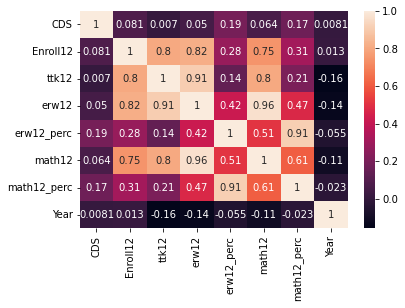

In [61]:
sat_df = sat_ca_new[sat_ca_new['RType'] == 'S']
sns.heatmap(sat_df.corr(),annot=True)

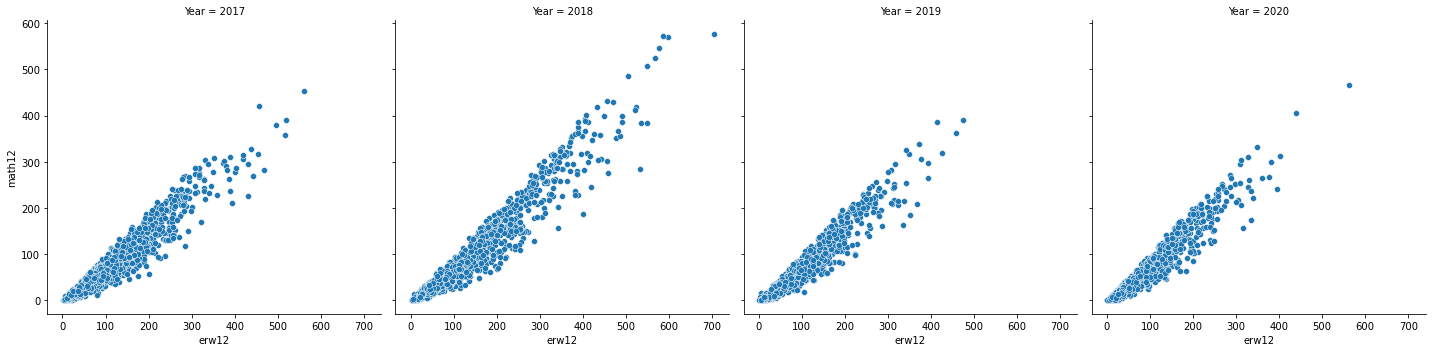

In [62]:
sns.relplot(x='erw12',y='math12',data=sat_df,col='Year')

##### SAT Trend Missing Value Analysis

In [63]:
### ERW Exam.
sat_df.pivot_table(values='erw12_perc',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    75.036075
2    11.616162
3     8.225108
1     5.122655
dtype: float64

In [64]:
### Math Exam.
sat_df.pivot_table(values='math12_perc',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    75.036075
2    11.616162
3     8.225108
1     5.122655
dtype: float64

##### Missing Value Filling Out.

In [65]:
sat_erw_trend = sat_df.pivot_table(values='erw12_perc',columns='Year',index='SName',aggfunc='mean')
sat_math_trend = sat_df.pivot_table(values='math12_perc',columns='Year',index='SName',aggfunc='mean')

sat_erw_trend['No. of Null'] = sat_erw_trend.isnull().sum(axis=1)
increase_trend_count(sat_erw_trend)
decrease_trend_count(sat_erw_trend)
sat_erw_trend = sat_erw_trend.fillna(0) 
sat_erw_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,Decreasing Trend
SName,,,,,,,
APEX Academy,28.89,29.41,15.22,0.00,1,1,1
ARISE High,36.17,35.85,33.33,34.78,0,1,2
Abraham Lincoln Continuation,0.00,0.00,17.65,0.00,3,0,0
Abraham Lincoln High,61.01,57.32,80.00,69.57,0,1,2
Abraham Lincoln Senior High,58.27,47.65,51.18,50.00,0,1,2


In [66]:
sat_math_trend['No. of Null'] = sat_math_trend.isnull().sum(axis=1)
increase_trend_count(sat_math_trend)
decrease_trend_count(sat_math_trend)
sat_math_trend = sat_math_trend.fillna(0)
sat_math_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,Decreasing Trend
SName,,,,,,,
APEX Academy,2.22,3.92,2.17,0.00,1,1,1
ARISE High,14.89,16.98,15.38,4.35,0,1,2
Abraham Lincoln Continuation,0.00,0.00,11.76,0.00,3,0,0
Abraham Lincoln High,40.14,37.07,51.88,46.96,0,1,2
Abraham Lincoln Senior High,50.39,31.54,33.86,46.81,0,2,1


#### Test taking Ratio

In [67]:
act_ttk = act_df.copy()
sat_ttk = sat_df.copy()

act_ttk['ttk_perc'] = act_ttk['NumTstTakr'] *100 / act_ttk['Enroll12']
sat_ttk['ttk_perc'] = sat_ttk['ttk12'] *100 / sat_ttk['Enroll12']

In [68]:
act_ttk.pivot_table(values='ttk_perc',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    66.432954
2    12.708151
1    12.269939
3     8.588957
dtype: float64

In [69]:
sat_ttk.pivot_table(values='ttk_perc',index='Year',columns='SName',aggfunc='mean').isnull()\
.sum().value_counts(normalize=True)*100

0    75.036075
2    11.616162
3     8.225108
1     5.122655
dtype: float64

##### TTk Missing Value Filling Out

In [70]:
act_ttk_trend = act_ttk.pivot_table(values='ttk_perc',columns='Year',index='SName',aggfunc='mean')
sat_ttk_trend = sat_ttk.pivot_table(values='ttk_perc',columns='Year',index='SName',aggfunc='mean')

act_ttk_trend['No. of Null'] = act_ttk_trend.isnull().sum(axis=1)
increase_trend_count(act_ttk_trend)
act_ttk_trend = act_ttk_trend.fillna(0)
act_ttk_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend
SName,,,,,,
ACE Charter High,88.333333,68.253968,82.926829,72.413793,0,1
APEX Academy,24.050633,39.325843,36.585366,0.000000,1,1
Abraham Lincoln High,15.203426,9.090909,11.447084,12.441315,0,2
Abraham Lincoln Senior High,26.146789,15.853659,8.407080,0.000000,1,0
Academia Avance Charter,0.000000,0.000000,50.769231,0.000000,3,0


In [71]:
sat_ttk_trend['No. of Null'] = sat_ttk_trend.isnull().sum(axis=1)
increase_trend_count(sat_ttk_trend)
sat_ttk_trend = sat_ttk_trend.fillna(0)
sat_ttk_trend.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend
SName,,,,,,
APEX Academy,56.962025,57.303371,56.097561,0.000000,1,1
ARISE High,90.384615,88.333333,57.352941,33.823529,0,0
Abraham Lincoln Continuation,0.000000,0.000000,14.912281,0.000000,3,0
Abraham Lincoln High,93.361884,90.909091,34.557235,26.995305,0,0
Abraham Lincoln Senior High,58.256881,60.569106,56.194690,37.751004,0,1


### Test Taker Size Scenario

In [72]:
act_ttk_size = act_df.pivot_table(index='SName',columns='Year',values='NumTstTakr')
sat_ttk_size = sat_df.pivot_table(index='SName',columns='Year',values='ttk12')

act_ttk_size['No. of Null'] = act_ttk_size.isnull().sum(axis=1) 
increase_trend_count(act_ttk_size)
act_ttk_size = act_ttk_size.fillna(0)

act_ttk_size['2017_ttks'] = act_ttk_size[2017]*5/max(act_ttk_size[2017])
act_ttk_size['2018_ttks'] = act_ttk_size[2018]*5/max(act_ttk_size[2018])
act_ttk_size['2019_ttks'] = act_ttk_size[2019]*5/max(act_ttk_size[2019])
act_ttk_size['2020_ttks'] = act_ttk_size[2020]*5/max(act_ttk_size[2020])

act_ttk_size.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,2017_ttks,2018_ttks,2019_ttks,2020_ttks
SName,,,,,,,,,,
ACE Charter High,53.0,43.0,34.0,63.0,0,1,0.440932,0.325758,0.332031,0.518092
APEX Academy,19.0,35.0,30.0,0.0,1,1,0.158070,0.265152,0.292969,0.000000
Abraham Lincoln High,71.0,41.0,53.0,53.0,0,1,0.590682,0.310606,0.517578,0.435855
Abraham Lincoln Senior High,57.0,39.0,19.0,0.0,1,0,0.474210,0.295455,0.185547,0.000000
Academia Avance Charter,0.0,0.0,33.0,0.0,3,0,0.000000,0.000000,0.322266,0.000000


In [73]:
sat_ttk_size['No. of Null'] = sat_ttk_size.isnull().sum(axis=1) 
increase_trend_count(sat_ttk_size)
sat_ttk_size = sat_ttk_size.fillna(0)

sat_ttk_size['2017_ttks'] = sat_ttk_size[2017]*100/max(sat_ttk_size[2017])
sat_ttk_size['2018_ttks'] = sat_ttk_size[2018]*100/max(sat_ttk_size[2018])
sat_ttk_size['2019_ttks'] = sat_ttk_size[2019]*100/max(sat_ttk_size[2019])
sat_ttk_size['2020_ttks'] = sat_ttk_size[2020]*100/max(sat_ttk_size[2020])

sat_ttk_size.head()

Year,2017,2018,2019,2020,No. of Null,Increasing Trend,2017_ttks,2018_ttks,2019_ttks,2020_ttks
SName,,,,,,,,,,
APEX Academy,45.0,51.0,46.0,0.0,1,1,5.569307,4.590459,4.935622,0.000000
ARISE High,47.0,53.0,39.0,23.0,0,1,5.816832,4.770477,4.184549,2.587177
Abraham Lincoln Continuation,0.0,0.0,17.0,0.0,3,0,0.000000,0.000000,1.824034,0.000000
Abraham Lincoln High,436.0,410.0,160.0,115.0,0,0,53.960396,36.903690,17.167382,12.935883
Abraham Lincoln Senior High,127.0,149.0,127.0,94.0,0,1,15.717822,13.411341,13.626609,10.573678


### Personal Income by County

In [74]:
pi = pd.read_excel(r'./additional data/Personal_Income_per_capita.xlsx')
pi['Increasing Trend'] = (pi[2019] > pi[2018]).astype(int)\
     + (pi[2020] > pi[2019]).astype(int)

## Percentage of Personal Income.
pi['2018_perc'] = pi[2018] *100 / max(pi[2018])
pi['2019_perc'] = pi[2019] *100 / max(pi[2019])
pi['2020_perc'] = pi[2020] *100 / max(pi[2020])
pi.head()

,California_County,2018,2019,2020,Increasing Trend,2018_perc,2019_perc,2020_perc
0,Alameda,75354,78839,87078,2,57.086364,56.758313,59.816589
1,Alpine,76104,79701,76175,1,57.654545,57.378890,52.326979
2,Amador,42466,43979,47721,2,32.171212,31.661663,32.781041
3,Butte,42441,45175,50279,2,32.152273,32.522696,34.538211
4,Calaveras,46818,48460,53026,2,35.468182,34.887655,36.425210


#### ACT Personal Income

In [75]:
act_school = act19_ca[['SName','CName']]
act_school = act_school.merge(pi,left_on='CName',right_on='California_County')
act_school = act_school[['SName','Increasing Trend','2018_perc','2019_perc','2020_perc']]
act_school = act_school.rename(columns={'Increasing Trend':'Increasing_Trend_act_pi'})
act_school.head()

,SName,Increasing_Trend_act_pi,2018_perc,2019_perc,2020_perc
0,21st Century Learning Institute,2,30.268939,29.794173,31.484802
1,Arlington High,2,30.268939,29.794173,31.484802
2,Banning High,2,30.268939,29.794173,31.484802
3,Banning Independent Study,2,30.268939,29.794173,31.484802
4,Beaumont Senior High,2,30.268939,29.794173,31.484802


#### SAT Personal Income

In [76]:
sat_school = sat19_ca[['SName','CName']]
sat_school = sat_school.merge(pi,left_on='CName',right_on='California_County')
sat_school = sat_school[['SName','Increasing Trend','2018_perc','2019_perc','2020_perc']]
sat_school = sat_school.rename(columns={'Increasing Trend':'Increasing_Trend_sat_pi'})
sat_school.head()

,SName,Increasing_Trend_sat_pi,2018_perc,2019_perc,2020_perc
0,Colusa Alternative Home,1,35.320455,32.152653,39.417482
1,Maxwell Sr High,1,35.320455,32.152653,39.417482
2,Pierce High,1,35.320455,32.152653,39.417482
3,Williams Junior/Senior High,1,35.320455,32.152653,39.417482
4,Colusa High,1,35.320455,32.152653,39.417482


## Section 4: Data Handling
#### ACT Rename before Merge File.

In [77]:
name_list = ['_act_eng','_act_read','_act_math','_act_sci','_ttk','_ttk_size']
file = ['act_eng_trend','act_read_trend','act_math_trend','act_sci_trend','act_ttk_trend','act_ttk_size']
for i in range(6):
    globals()[file[i]] = globals()[file[i]].rename(\
    columns={'No. of Null':'No. of Null'+name_list[i],'Increasing Trend':'Increasing Trend'+name_list[i]
             ,'Decreasing Trend':'Decreasing Trend'+name_list[i]})
    globals()[file[i]] = globals()[file[i]].iloc[:,4:]
    globals()[file[i]] = globals()[file[i]].reset_index()

In [78]:
act_school.head()

,SName,Increasing_Trend_act_pi,2018_perc,2019_perc,2020_perc
0,21st Century Learning Institute,2,30.268939,29.794173,31.484802
1,Arlington High,2,30.268939,29.794173,31.484802
2,Banning High,2,30.268939,29.794173,31.484802
3,Banning Independent Study,2,30.268939,29.794173,31.484802
4,Beaumont Senior High,2,30.268939,29.794173,31.484802


#### ACT After Merge File.

In [79]:
act_pd = pd.merge(act_math_trend,act_eng_trend,on='SName')
act_pd = pd.merge(act_pd,act_read_trend,on='SName')
act_pd = pd.merge(act_pd,act_sci_trend,on='SName')
act_pd = pd.merge(act_pd,act_ttk_trend,on='SName')
act_pd = pd.merge(act_pd,act_ttk_size,on='SName')
act_pd = pd.merge(act_pd,act_school,on='SName')
act_pd.head()

,SName,No. of Null_act_math,Increasing Trend_act_math,Decreasing Trend_act_math,No. of Null_act_eng,Increasing Trend_act_eng,Decreasing Trend_act_eng,No. of Null_act_read,Increasing Trend_act_read,Decreasing Trend_act_read,...,No. of Null_ttk_size,Increasing Trend_ttk_size,2017_ttks,2018_ttks,2019_ttks,2020_ttks,Increasing_Trend_act_pi,2018_perc,2019_perc,2020_perc
0,ACE Charter High,0,2,1,0,2,1,0,2,1,...,0,1,0.440932,0.325758,0.332031,0.518092,2,82.078788,82.538894,84.946591
1,APEX Academy,0,0,2,1,0,2,0,0,3,...,1,1,0.158070,0.265152,0.292969,0.000000,2,45.359091,45.386349,46.898162
2,Abraham Lincoln High,0,1,2,0,1,1,0,1,1,...,0,1,0.590682,0.310606,0.517578,0.435855,2,82.078788,82.538894,84.946591
3,Abraham Lincoln Senior High,0,1,2,1,1,1,0,1,2,...,1,0,0.474210,0.295455,0.185547,0.000000,2,45.359091,45.386349,46.898162
4,Academia Avance Charter,0,1,1,3,0,0,0,1,1,...,3,0,0.000000,0.000000,0.322266,0.000000,2,45.359091,45.386349,46.898162


#### SAT Rename before Merge File.

In [80]:
name_list = ['_sat_erw','_sat_math','_sat_ttk','_sat_ttk_size']
file = ['sat_erw_trend','sat_math_trend','sat_ttk_trend','sat_ttk_size']
for i in range(4):
    globals()[file[i]] = globals()[file[i]].rename(\
    columns={'No. of Null':'No. of Null'+name_list[i],'Increasing Trend':'Increasing Trend'+name_list[i]
             ,'Decreasing Trend':'Decreasing Trend'+name_list[i]})
    globals()[file[i]] = globals()[file[i]].iloc[:,4:]
    globals()[file[i]] = globals()[file[i]].reset_index()

#### SAT After Merge File.

In [81]:
sat_pd = pd.merge(sat_erw_trend,sat_math_trend,on='SName')
sat_pd = pd.merge(sat_pd,sat_ttk_trend,on='SName')
sat_pd = pd.merge(sat_pd,sat_ttk_size,on='SName')
sat_pd = pd.merge(sat_pd,sat_school,on='SName')
sat_pd.head()

,SName,No. of Null_sat_erw,Increasing Trend_sat_erw,Decreasing Trend_sat_erw,No. of Null_sat_math,Increasing Trend_sat_math,Decreasing Trend_sat_math,No. of Null_sat_ttk,Increasing Trend_sat_ttk,No. of Null_sat_ttk_size,Increasing Trend_sat_ttk_size,2017_ttks,2018_ttks,2019_ttks,2020_ttks,Increasing_Trend_sat_pi,2018_perc,2019_perc,2020_perc
0,APEX Academy,1,1,1,1,1,1,1,1,1,1,5.569307,4.590459,4.935622,0.000000,2,45.359091,45.386349,46.898162
1,ARISE High,0,1,2,0,1,2,0,0,0,1,5.816832,4.770477,4.184549,2.587177,2,57.086364,56.758313,59.816589
2,Abraham Lincoln Continuation,3,0,0,3,0,0,3,0,3,0,0.000000,0.000000,1.824034,0.000000,2,30.268939,29.794173,31.484802
3,Abraham Lincoln High,0,1,2,0,1,2,0,0,0,0,53.960396,36.903690,17.167382,12.935883,2,82.078788,82.538894,84.946591
4,Abraham Lincoln Senior High,0,1,2,0,2,1,0,1,0,1,15.717822,13.411341,13.626609,10.573678,2,45.359091,45.386349,46.898162


### Section 5 : Data Segmentation

In [82]:
act_pd.columns

Index(['SName', 'No. of Null_act_math', 'Increasing Trend_act_math',
       'Decreasing Trend_act_math', 'No. of Null_act_eng',
       'Increasing Trend_act_eng', 'Decreasing Trend_act_eng',
       'No. of Null_act_read', 'Increasing Trend_act_read',
       'Decreasing Trend_act_read', 'No. of Null_act_sci',
       'Increasing Trend_act_sci', 'Decreasing Trend_act_sci',
       'No. of Null_ttk', 'Increasing Trend_ttk', 'No. of Null_ttk_size',
       'Increasing Trend_ttk_size', '2017_ttks', '2018_ttks', '2019_ttks',
       '2020_ttks', 'Increasing_Trend_act_pi', '2018_perc', '2019_perc',
       '2020_perc'],
      dtype='object')

### 🆘 ACT Custumer Preference Score.

**Overall Score (12)** = ((Increasing Trend_ttk (3) * No. of Null_ttk) +  ((2017_ttks+2018_ttks+2019_ttks+2020_ttks')*3/400) + (Increasing_Trend_act_pi (3)) + ((2018_perc+2019_perc+2020_perc)/100)

**ACT Math Preference Score (AMPS)** : (Overall Score (12)+ (Increasing Trend_act_math (3) * No. of Null_act_math))/15

**ACT Eng Preference Score (AEPS)** : (Overall Score (12)+ (Increasing Trend_act_eng (3) * No. of Null_act_eng))/15

**ACT Reading Preference Score (ARPS)** : (Overall Score (12)+ (Increasing Trend_act_reading (3) * No. of Null_act_reading))/15

**ACT Science Preference Score (ASPS)** : (Overall Score (12)+ (Increasing Trend_act_sci (3) * No. of Null_act_sci))/15

In [83]:
### Overall Score
act_pd['Overall'] = (act_pd['Increasing Trend_ttk'] * (((act_pd['No. of Null_ttk'])+1)/4))  +\
((act_pd['2017_ttks'] + act_pd['2018_ttks'] + act_pd['2019_ttks'] + act_pd['2020_ttks'])*3/400)   +\
(act_pd['Increasing_Trend_act_pi']) +\
((act_pd['2018_perc'] + act_pd['2019_perc'] + act_pd['2020_perc'])/100)

### AMPS 
act_pd['AMPS'] = (act_pd['Overall'] + (act_pd['Decreasing Trend_act_math'] * (((act_pd['No. of Null_act_math'])+1)/4)))/15

### AEPS
act_pd['AEPS'] = (act_pd['Overall'] + (act_pd['Decreasing Trend_act_eng'] * (((act_pd['No. of Null_act_eng'])+1)/4)))/15

### ARPS
act_pd['ARPS'] = (act_pd['Overall'] + (act_pd['Decreasing Trend_act_read'] * (((act_pd['No. of Null_act_read'])+1)/4)))/15

### ASPS
act_pd['ASPS'] = (act_pd['Overall'] + (act_pd['Decreasing Trend_act_sci'] * (((act_pd['No. of Null_act_sci'])+1)/4)))/15

In [84]:
act_pd.head()

,SName,No. of Null_act_math,Increasing Trend_act_math,Decreasing Trend_act_math,No. of Null_act_eng,Increasing Trend_act_eng,Decreasing Trend_act_eng,No. of Null_act_read,Increasing Trend_act_read,Decreasing Trend_act_read,...,2020_ttks,Increasing_Trend_act_pi,2018_perc,2019_perc,2020_perc,Overall,AMPS,AEPS,ARPS,ASPS
0,ACE Charter High,0,2,1,0,2,1,0,2,1,...,0.518092,2,82.078788,82.538894,84.946591,4.757769,0.333851,0.333851,0.333851,0.333851
1,APEX Academy,0,0,2,1,0,2,0,0,3,...,0.000000,2,45.359091,45.386349,46.898162,3.881807,0.292120,0.325454,0.308787,0.292120
2,Abraham Lincoln High,0,1,2,0,1,1,0,1,1,...,0.435855,2,82.078788,82.538894,84.946591,5.009553,0.367304,0.350637,0.350637,0.333970
3,Abraham Lincoln Senior High,0,1,2,1,1,1,0,1,2,...,0.000000,2,45.359091,45.386349,46.898162,3.383600,0.258907,0.258907,0.258907,0.258907
4,Academia Avance Charter,0,1,1,3,0,0,0,1,1,...,0.000000,2,45.359091,45.386349,46.898162,3.378853,0.241924,0.225257,0.241924,0.241924


In [85]:
sat_pd.columns

Index(['SName', 'No. of Null_sat_erw', 'Increasing Trend_sat_erw',
       'Decreasing Trend_sat_erw', 'No. of Null_sat_math',
       'Increasing Trend_sat_math', 'Decreasing Trend_sat_math',
       'No. of Null_sat_ttk', 'Increasing Trend_sat_ttk',
       'No. of Null_sat_ttk_size', 'Increasing Trend_sat_ttk_size',
       '2017_ttks', '2018_ttks', '2019_ttks', '2020_ttks',
       'Increasing_Trend_sat_pi', '2018_perc', '2019_perc', '2020_perc'],
      dtype='object')

### 🆗 SAT Custumer Preference Score.

**Overall Score (12)** = ((Increasing Trend_sat_ttk (3) * No. of Null_ttk) +  ((2017_ttks+2018_ttks+2019_ttks+2020_ttks')*3/400) + (Increasing_Trend_act_pi (3)) + ((2018_perc+2019_perc+2020_perc)/100)

**SAT ERW Preference Score (SEPS)** : (Overall Score (12)+ (Increasing Trend_sat_erw (3) * No. of Null_sat_erw))/15

**SAT Math Preference Score (SMPS)** : (Overall Score (12)+ (Increasing Trend_sat_math (3) * No. of Null_sat_math))/15

In [86]:
### Overall Score
sat_pd['Overall'] = (sat_pd['Increasing Trend_sat_ttk'] * (((sat_pd['No. of Null_sat_ttk'])+1)/4))  +\
((sat_pd['2017_ttks'] + sat_pd['2018_ttks'] + sat_pd['2019_ttks'] + sat_pd['2020_ttks'])*3/400)   +\
(sat_pd['Increasing_Trend_sat_pi']) +\
((sat_pd['2018_perc'] + sat_pd['2019_perc'] + sat_pd['2020_perc'])/100)

### SEPS
sat_pd['SEPS'] = (sat_pd['Overall'] + (sat_pd['Decreasing Trend_sat_erw'] * (((sat_pd['No. of Null_sat_erw'])+1)/4)))/15

### SMPS
sat_pd['SMPS'] = (sat_pd['Overall'] + (sat_pd['Decreasing Trend_sat_math'] * (((sat_pd['No. of Null_sat_math'])+1)/4)))/15

In [87]:
sat_pd.head()

,SName,No. of Null_sat_erw,Increasing Trend_sat_erw,Decreasing Trend_sat_erw,No. of Null_sat_math,Increasing Trend_sat_math,Decreasing Trend_sat_math,No. of Null_sat_ttk,Increasing Trend_sat_ttk,No. of Null_sat_ttk_size,...,2018_ttks,2019_ttks,2020_ttks,Increasing_Trend_sat_pi,2018_perc,2019_perc,2020_perc,Overall,SEPS,SMPS
0,APEX Academy,1,1,1,1,1,1,1,1,1,...,4.590459,4.935622,0.000000,2,45.359091,45.386349,46.898162,3.989651,0.299310,0.299310
1,ARISE High,0,1,2,0,1,2,0,0,0,...,4.770477,4.184549,2.587177,2,57.086364,56.758313,59.816589,3.866805,0.291120,0.291120
2,Abraham Lincoln Continuation,3,0,0,3,0,0,3,0,3,...,0.000000,1.824034,0.000000,2,30.268939,29.794173,31.484802,2.929159,0.195277,0.195277
3,Abraham Lincoln High,0,1,2,0,1,2,0,0,0,...,36.903690,17.167382,12.935883,2,82.078788,82.538894,84.946591,5.402898,0.393527,0.393527
4,Abraham Lincoln Senior High,0,1,2,0,2,1,0,1,0,...,13.411341,13.626609,10.573678,2,45.359091,45.386349,46.898162,4.026407,0.301760,0.285094


### ACT Segmentation Scale 

1. 0.0 - 0.2  : Decrease 40 %
2. 0.2 - 0.4  : Decrease 20 %.
3. 0.4 - 0.6  : Maintain Promotion
4. 0.6 - 0.8  : Increase 20 %
5. 0.8 - 1.0  : increase 40 %

In [98]:
def condition(x):
    if x <= 0.2:
        return 'Decrease 40 %'
    elif x <= 0.4:
        return 'Decrease 20 %'
    elif x <= 0.6:
        return 'Maintain Promotion'
    elif x <= 0.8:
        return 'Increase 20 %'
    else:
        return 'Increase 40 %'

In [101]:
act_pd['AMPS_Score'] = act_pd['AMPS'].apply(condition)
act_pd['AEPS_Score'] = act_pd['AEPS'].apply(condition)
act_pd['ARPS_Score'] = act_pd['ARPS'].apply(condition)
act_pd['ASPS_Score'] = act_pd['ASPS'].apply(condition)

In [102]:
act_pd.head()

,SName,No. of Null_act_math,Increasing Trend_act_math,Decreasing Trend_act_math,No. of Null_act_eng,Increasing Trend_act_eng,Decreasing Trend_act_eng,No. of Null_act_read,Increasing Trend_act_read,Decreasing Trend_act_read,...,2020_perc,Overall,AMPS,AEPS,ARPS,ASPS,AMPS_Score,AEPS_Score,ARPS_Score,ASPS_Score
0,ACE Charter High,0,2,1,0,2,1,0,2,1,...,84.946591,4.757769,0.333851,0.333851,0.333851,0.333851,Decrease 20 %,Decrease 20 %,Decrease 20 %,Decrease 20 %
1,APEX Academy,0,0,2,1,0,2,0,0,3,...,46.898162,3.881807,0.292120,0.325454,0.308787,0.292120,Decrease 20 %,Decrease 20 %,Decrease 20 %,Decrease 20 %
2,Abraham Lincoln High,0,1,2,0,1,1,0,1,1,...,84.946591,5.009553,0.367304,0.350637,0.350637,0.333970,Decrease 20 %,Decrease 20 %,Decrease 20 %,Decrease 20 %
3,Abraham Lincoln Senior High,0,1,2,1,1,1,0,1,2,...,46.898162,3.383600,0.258907,0.258907,0.258907,0.258907,Decrease 20 %,Decrease 20 %,Decrease 20 %,Decrease 20 %
4,Academia Avance Charter,0,1,1,3,0,0,0,1,1,...,46.898162,3.378853,0.241924,0.225257,0.241924,0.241924,Decrease 20 %,Decrease 20 %,Decrease 20 %,Decrease 20 %


### SAT Segmentation Scale 

1. 0.0 - 0.2  : Decrease 40 %
2. 0.2 - 0.4  : Decrease 20 %.
3. 0.4 - 0.6  : Maintain Promotion
4. 0.6 - 0.8  : Increase 20 %
5. 0.8 - 1.0  : increase 40 %

In [104]:
sat_pd['SEPS_Score'] = sat_pd['SEPS'].apply(condition)
sat_pd['SMPS_Score'] = sat_pd['SMPS'].apply(condition)

In [105]:
sat_pd.head()

,SName,No. of Null_sat_erw,Increasing Trend_sat_erw,Decreasing Trend_sat_erw,No. of Null_sat_math,Increasing Trend_sat_math,Decreasing Trend_sat_math,No. of Null_sat_ttk,Increasing Trend_sat_ttk,No. of Null_sat_ttk_size,...,2020_ttks,Increasing_Trend_sat_pi,2018_perc,2019_perc,2020_perc,Overall,SEPS,SMPS,SEPS_Score,SMPS_Score
0,APEX Academy,1,1,1,1,1,1,1,1,1,...,0.000000,2,45.359091,45.386349,46.898162,3.989651,0.299310,0.299310,Decrease 20 %,Decrease 20 %
1,ARISE High,0,1,2,0,1,2,0,0,0,...,2.587177,2,57.086364,56.758313,59.816589,3.866805,0.291120,0.291120,Decrease 20 %,Decrease 20 %
2,Abraham Lincoln Continuation,3,0,0,3,0,0,3,0,3,...,0.000000,2,30.268939,29.794173,31.484802,2.929159,0.195277,0.195277,Decrease 40 %,Decrease 40 %
3,Abraham Lincoln High,0,1,2,0,1,2,0,0,0,...,12.935883,2,82.078788,82.538894,84.946591,5.402898,0.393527,0.393527,Decrease 20 %,Decrease 20 %
4,Abraham Lincoln Senior High,0,1,2,0,2,1,0,1,0,...,10.573678,2,45.359091,45.386349,46.898162,4.026407,0.301760,0.285094,Decrease 20 %,Decrease 20 %


### 🎩Section 5 : Result Analysis